# 第五週: 中文文集的情緒分析2

**Author:** 蔡睿澤<br>
**Date created:** 2024/03/10<br>
**Last modified:** 2024/03/10<br><br>
本週課程為「情緒分析2」，與情緒分析1不同，這次會使用中研院提供的CKIP自然語言處理工具包，但其中不像coreNLP有提供情緒分析套件，所以在此介紹一款用於中文情緒分析的套件SnowNLP，是Courpus-base的情緒分析，不是使用情緒字典，而是使用預訓練的情緒分析模型或演算法，給與整個文章一個情緒分數。情緒分析2的步驟會因所要分析之語言不同而有所差異，在這個Jupyter Notebook當中將會展示「中文」的情緒分析，並且搭配python程式碼進行講解。在後面的內容中會介紹CKIP、分析方法、SnowNLP

## 大綱
1. 套件說明
2. CKIP 介紹
    + 2.1 安裝CKIP
    + 2.2 利用CKIP進行自然語言處理
3. CKIP 標註
    + 3.1 將抓取結果用CKIP進行處理
    + 3.2 探索分析 - NER
    + 3.3 探索分析 - POS
4. 利用SnowNLP進行情緒分析

## 1. 套件說明
下面列出在本次實作過程中我們所使用到的相關套件，在這個Jupyter Notebook當中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
- pandas: 一個資料分析的函式庫，提供了DataFrame等資料格式，與資料處理的函數。
- CKIP: 全名為Chinese Knowledge and Information Processing，中研院開發的中文自然語言處理工具。
- wordcloud: 文字雲繪圖工具。
- matplotlib: 繪圖工具。
- SnowNLP: SnowNLP是一個可以方便的處理中文文本內容的python類庫，是受到了TextBlob的啟發而寫的。SnowNLP主要功能包括斷詞、詞性標註、情緒分析、漢字轉拼音、繁體轉簡體、關鍵詞提取以及文本摘要等等。

In [1]:
# 安裝會使用到的套件
# 安裝ckiptagger前要先安裝tensorflow，有套件相依的問題
# %pip install -U ckiptagger\[tf,gdown\]
# %pip install wordcloud SnowNLP

In [2]:
# 確認當前工作目錄
# %pwd

In [1]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

如果有重新裝package，記得需要restart kernel 才會使用更新後的套件

## 2. CKIP 介紹
- 是中研院詞庫小組開發的中文自然語言處理套件，其斷詞效果比起`jieba`效果更好，並且提供性命名實體辨識、詞性標註、句法分析
- github: https://github.com/ckiplab/ckiptagger

### 2.1 CKIP安裝

In [4]:
data_utils.download_data_gdown("./")  # 下載ckip model

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=bc57817d-14ed-44e5-9a15-53b34906bb91
To: c:\新電腦\課業\1122\社媒\SMA_2024S\week5\data.zip
  4%|▍         | 82.3M/1.88G [00:07<02:48, 10.7MB/s]

: 

### 2.2 利用CKIP進行自然語言處理
透過ckip這個套件可以對文集進行斷詞、命名實體辨識、詞性標記等處理
+ CKIP 標註任務
    + 斷詞（ws）
        + 可以設定自己的辭典
            + `recommend_dictionary` 推薦字典
            + `coerce_dictionary` 強制字典
    + 實體辨識（ner）
    + 詞性標註（pos）
+ NER與POS名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [2]:
# 將三份工具的模型路徑指向我們剛才下載的檔案「data」
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

c:\Users\win90\AppData\Local\Programs\Python\Python310\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\win90\AppData\Local\Programs\Python\Python310\lib\site-packages\ckiptagger\model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
c:\Users\win90\AppData\Local\Programs\Python\Python310\lib\site-packages\ckiptagger\model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by

In [3]:
# 自定義辭典
word_to_weight = {
    "魔法覺醒": 100,
    "睽違已久": 100,
}
dictionary1 = construct_dictionary(word_to_weight)
print(dictionary1)

[(4, {'魔法覺醒': 100.0, '睽違已久': 100.0})]


In [4]:
sentence_list = [
    "哈利波特魔法覺醒是一個中國網易代理的粉絲睽違已久的手遊app",
    "很多人滿心期待這款英國出品的遊戲，卻又害怕受傷害"
]

word_sentence_list = ws(sentence_list, coerce_dictionary = dictionary1)  # 斷詞，可以嘗試不放斷詞字典，看看結果會有什麼不同
# word_sentence_list = ws(sentence_list)  # 斷詞，可以嘗試不放斷詞字典，看看結果會有什麼不同

pos_sentence_list = pos(word_sentence_list) # 詞性標註
entity_sentence_list = ner(word_sentence_list, pos_sentence_list) # NER 分析

def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print("="*30)
    print(f"sentence {i}: {sentence}")
    print("\nPOS: ")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i]) # 段詞 & 詞性
    print("\nNER: ")
    for entity in sorted(entity_sentence_list[i]):
        print(entity)
    


sentence 0: 哈利波特魔法覺醒是一個中國網易代理的粉絲睽違已久的手遊app

POS: 
哈利波特(Nb)　魔法覺醒(Nb)　是(SHI)　一(Neu)　個(Nf)　中國(Nc)　網易(Nb)　代理(VC)　的(DE)　粉絲(Na)　睽違已久(VH)　的(DE)　手遊(Na)　app(FW)　

NER: 
(11, 13, 'NORP', '中國')
(13, 15, 'ORG', '網易')

sentence 1: 很多人滿心期待這款英國出品的遊戲，卻又害怕受傷害

POS: 
很多(Neqa)　人(Na)　滿心(D)　期待(VK)　這(Nep)　款(Nf)　英國(Nc)　出品(VC)　的(DE)　遊戲(Na)　，(COMMACATEGORY)　卻(D)　又(D)　害怕(VK)　受(VJ)　傷害(Na)　

NER: 
(9, 11, 'GPE', '英國')


## 3. CKIP 標註

### 3.1 將抓取結果用CKIP進行處理
資料來源：
+ 工作流程平台蒐集PTT 美食版(Food)文章
+ 關鍵字:「吃到飽」(1630筆)
+ 時間: 2020-01-10 ~ 2022-12-31

我們已經介紹過CKIP的使用方式，現在來對PTT的資料使用CKIP進行自然語言處理

In [13]:
## 讀取文章
df = pd.read_csv('dataset.csv')
df.head(3)

system_id                                             artUrl  \
0          1  https://www.ptt.cc/bbs/Japan_Travel/M.16411981...   
1          2  https://www.ptt.cc/bbs/Japan_Travel/M.16444013...   
2          3  https://www.ptt.cc/bbs/Japan_Travel/M.16444647...   

                  artTitle              artDate  artPoster   artCatagory  \
0         [住宿]關西W大阪(WHotel  2022-01-03 16:21:57  iPhone777  Japan_Travel   
1  [遊記]北海道8天7夜自駕遊(厚岸、星野等)下  2022-02-09 18:08:29  colon1114  Japan_Travel   
2   [住宿]星野磐梯山溫泉飯店，體驗時髦的大人感  2022-02-10 11:45:17      fussy  Japan_Travel   

                                          artContent  \
0  新年快樂!!!\n\n\n造訪日期：2121.11\n\n從上回寫完佐渡懶人包之後可能精疲力...   
1  時間：2019年6月\n\n主要城市：旭川、美瑛、北見、阿寒、釧路、帶廣、占冠村、札幌\n\...   
2  造訪日期：2019.03\n\n圖文版網誌\nhttps://natasha-travele...   

                                          artComment            e_ip  \
0  [{"cmtStatus": "推", "cmtPoster": "skyangle0607...    14.8.132.225   
1  [{"cmtStatus": "→", "cmtPoster": "wingthink", ...  220.136.110.47   
2  [{"cmtStatus": "推", "cmtPoster": "kgcem", "cmt...   61.216.83.164   

          insertedDate dataSource  
0  2022-01-04 00:58:26        ptt  
1  2022-02-10 00:55:40        ptt  
2  2022-02-11 00:56:00        ptt

定義文字清理的相關function

In [18]:
def Segmentation_Core(data, tokenizer):
    # 將所有的斷行字元配上 escape 以防失效
    regexPattern = '|'.join(map(re.escape, tokenizer))
    output_list = re.split(regexPattern, data)
    # 過濾空白行
    output_list = list(filter(None, output_list))
    return output_list

def Sentence_Segmentation(article, keep_digits=False, keep_alphabets=False):
    """ Sentence_Segmentation function 用於執行中文斷行任務

    順序如下：
    1. 去除(\\n)
    2. 去除特殊符號字元
    3. 保留數字
    4. 依照斷句字元進行斷句全形的分號、逗號、句號、問號以及驚嘆號
    5. 避免空白斷句結果

    Args:
        article(string): 欲斷行之文章內容
        keep_digits(Boolean): 決定是否保留數字於斷行後的結果
        keep_alphabets(Boolean): 決定是否保留字母於斷行後的結果
    Returns:
        List [] 每個 element 就是一行
    """
    sepical_symbols = r'[.＂<>:《》+\-=#$%&()*@＃＄％＆＇\(\)\[\]\{\}（）＊＋－／：\
    ＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—一‘’‛“”„‟…‧﹏★→─]+'
    segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
    

    paragraphs = list(filter(lambda x: re.sub(r'\s+','', x), article.split("\n"))) # 依\n分行
    print(len(paragraphs))
    print(paragraphs)
    
    result = []
    for paragraph in paragraphs:

        clean_paragraph = paragraph
        try:
            if not keep_digits:
                clean_paragraph = re.sub(r'\d*\.?\d+','', clean_paragraph) #remove space & digits
            if not keep_alphabets:
                clean_paragraph = re.sub('[a-zA-Z]+', '', clean_paragraph)
            
            clean_paragraph = re.sub(r'[\s]+','', clean_paragraph) #remove space
            
            clean_paragraph = re.sub(sepical_symbols,'',clean_paragraph)
            
        except:
            return "error"
        
        res = Segmentation_Core(clean_paragraph, segmentation_used_note)
        result.append(res)
    
    return result

CKIP 處理相關function

In [19]:
# 自定義辭典
with open('dict/user_dict.txt', encoding = 'utf-8') as f:
    lines = f.read().splitlines()

dict = {k.split()[0]: k.split()[1] for v, k in enumerate(lines)}
dictionary2 = construct_dictionary(dict)
print(dictionary2)

[(2, {'拌飯': 500.0, '嚼勁': 500.0}), (3, {'重口味': 500.0, '炸物區': 500.0, '雞腿排': 500.0, '鴛鴦鍋': 500.0, '醬料區': 500.0, '新馬辣': 500.0, '肉次方': 500.0, '雪花牛': 500.0, '梅花豬': 500.0, '自助區': 500.0, '新北市': 500.0, '壽喜燒': 500.0, '握壽司': 500.0, '火鍋料': 500.0, '鮭魚卵': 500.0, '土瓶蒸': 500.0, '信義店': 500.0, '文山店': 500.0, '大安店': 500.0, '忠孝店': 500.0}), (4, {'饗食天堂': 500.0, '漢來海港': 500.0, '肋眼牛排': 500.0, '石頭火鍋': 500.0, '平日晚餐': 500.0, '韓式炸雞': 500.0, '梅花豬肉': 500.0, '日本料理': 500.0, '玉米濃湯': 500.0, '生菜沙拉': 500.0, '天使紅蝦': 500.0, '麻辣鴨血': 500.0, '火烤兩吃': 500.0, '剝皮辣椒': 500.0, '一蘭拉麵': 500.0})]


In [20]:
def get_pos(post_id, word_sentence, pos_sentence):
    tokens = []
    # print("\nPOS: ", end="\u3000")
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence): # token level
        tokens.append([post_id, word, pos]) 
    # print(f"{word}({pos})", end="\u3000")
    return tokens

def get_ner(post_id, entity_sentence):
    entities = []
    # print("\nNER:___________ ")
    for entity in sorted(entity_sentence): # token level
        entities.append([post_id, entity[3], entity[2]]) 
    return entities

def get_nlp_result(data_df):
    start = time.time()

    pos_list = []
    entity_list = []
    sentence_list = []
    
    # 遍歷 dataframe 的每筆資料
    for index, row in data_df.iterrows(): # document level    
    # print(f"\ndocument {index}") 

        # 資料清理 ＆ 斷句
        tmp = Sentence_Segmentation(row['artContent']) 
        flat_list = [item for sublist in tmp for item in sublist]

        # ckip
        word_sentence_list = ws(flat_list, coerce_dictionary = dictionary2)
        pos_sentence_list = pos(word_sentence_list)
        entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

        # 遍歷該 document 中的每一個句子
        for i, sentence in enumerate(flat_list):
            # print(f"sentence {i}: {sentence}")
            sentence_list.append([row['system_id'], sentence])            
            temp_tokens = get_pos(row['system_id'], word_sentence_list[i], pos_sentence_list[i])
            temp_entites = get_ner(row['system_id'], entity_sentence_list[i])

            pos_list.append(temp_tokens)
            if len(temp_entites) != 0:
                entity_list.append(temp_entites)
            
    pos_flat = [item for sublist in pos_list for item in sublist]
    entity_flat = [item for sublist in entity_list for item in sublist]

    pos_table = pd.DataFrame(data=pos_flat, 
                    columns=['system_id','word','pos'])        
    
    entity_table = pd.DataFrame(data=entity_flat, 
                        columns=['system_id','word','ner']) 

    sentence_table = pd.DataFrame(data=sentence_list, 
                    columns=['system_id','sentence']) 

    end = time.time()
    print("time costing: {}".format(end - start))

    return pos_table, entity_table, sentence_table

In [22]:
# 看看 tmp 和 flat_list 有什麼差別
tmp = Sentence_Segmentation(df['artContent'][0]) 
flat_list = [item for sublist in tmp for item in sublist]
print(tmp[:5])
print(flat_list[:5])

39
['新年快樂!!!', '造訪日期：2121.11', '從上回寫完佐渡懶人包之後可能精疲力竭，超久都沒碰blog', '但想說為了維持乾淨版面 每年年費還是有在繳...加減也要output一下 XD', '2022年也請大大多多指教 Orz Orz Orz', 'https://niigata.tw/w-osaka/', 'W大阪是日本第一家W hotel，本身定位為高級飯店', '但整體又布置得像在開趴，在七彩霓虹燈下還可以享受高級fu，算是相當另類的style', '在萬豪系列飯店裡頭，有另一品牌叫做Moxy', '感覺也是有點這類風格，但高級度還是差W一級', '那開完趴就快速開房間嚕(誤)', '順帶一提，W大阪也可以使用moblie key', '也就是check in的時候會把鑰匙灌到?大大的手機裡頭', '用手機也可以開門，個人是覺得如果不用check in這關，就可以直接開房的話，拿', 'mobile key就有意義拉…', '這次的房型「Marvelous Suite」，個人認為最大特色就是可以盡情享受大阪夜景(後述)', '充滿童心的設計，附設的mini bar在一般房型也會登場', '就算不在lobby開趴在房間也可以開就是了ㄎㄎ', '寢室，角落接近落地窗的設計，在各大訂房網站的客室介紹也會看到類似照片，可以說是', 'W大阪的代表房型', '但好像大多在網路的照片都是白天版，請由XXX來一張夜景版', '大大喜歡嗎(羞', '邊泡澡邊享受夜景', '類似這樣，不過還是開燈泡比較正常吧XD', '迎接清晨，因為看大銀杏的關係沒到房間多久就睡覺了XD', '除了上述介紹之外，房間還有很多小細節很值得注意', '像是備品的品質，有竹製的牙刷等等，也都讓人延續嗨度XD', '接著來到早餐會場', '告別晚上的party people(草)，早餐會場Oh.lala…的用餐環境相當舒適明亮', '真不愧是W，牆面的設計也是有夠古錐', '雖說是自助式，但防疫也是重要的喔(咻)', '自助餐點舉例，實際當然更豐盛 嘿嘿', '每一個人可以選1主菜，該餐廳的主廚推薦是「エッグベネディクト」也就是大量酪梨的', '班尼迪克蛋', '主菜當然是有一定程度美味，但我個人其實對整體的評價更是不錯，算是繼奈良marriott', '後相當令人有好印象的早餐

In [24]:
pos_table, entity_table, sentence_table = get_nlp_result(df)

39
['新年快樂!!!', '造訪日期：2121.11', '從上回寫完佐渡懶人包之後可能精疲力竭，超久都沒碰blog', '但想說為了維持乾淨版面 每年年費還是有在繳...加減也要output一下 XD', '2022年也請大大多多指教 Orz Orz Orz', 'https://niigata.tw/w-osaka/', 'W大阪是日本第一家W hotel，本身定位為高級飯店', '但整體又布置得像在開趴，在七彩霓虹燈下還可以享受高級fu，算是相當另類的style', '在萬豪系列飯店裡頭，有另一品牌叫做Moxy', '感覺也是有點這類風格，但高級度還是差W一級', '那開完趴就快速開房間嚕(誤)', '順帶一提，W大阪也可以使用moblie key', '也就是check in的時候會把鑰匙灌到?大大的手機裡頭', '用手機也可以開門，個人是覺得如果不用check in這關，就可以直接開房的話，拿', 'mobile key就有意義拉…', '這次的房型「Marvelous Suite」，個人認為最大特色就是可以盡情享受大阪夜景(後述)', '充滿童心的設計，附設的mini bar在一般房型也會登場', '就算不在lobby開趴在房間也可以開就是了ㄎㄎ', '寢室，角落接近落地窗的設計，在各大訂房網站的客室介紹也會看到類似照片，可以說是', 'W大阪的代表房型', '但好像大多在網路的照片都是白天版，請由XXX來一張夜景版', '大大喜歡嗎(羞', '邊泡澡邊享受夜景', '類似這樣，不過還是開燈泡比較正常吧XD', '迎接清晨，因為看大銀杏的關係沒到房間多久就睡覺了XD', '除了上述介紹之外，房間還有很多小細節很值得注意', '像是備品的品質，有竹製的牙刷等等，也都讓人延續嗨度XD', '接著來到早餐會場', '告別晚上的party people(草)，早餐會場Oh.lala…的用餐環境相當舒適明亮', '真不愧是W，牆面的設計也是有夠古錐', '雖說是自助式，但防疫也是重要的喔(咻)', '自助餐點舉例，實際當然更豐盛 嘿嘿', '每一個人可以選1主菜，該餐廳的主廚推薦是「エッグベネディクト」也就是大量酪梨的', '班尼迪克蛋', '主菜當然是有一定程度美味，但我個人其實對整體的評價更是不錯，算是繼奈良marriott', '後相當令人有好印象的早餐

+ 欄位名稱介紹
    + pos_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + pos : part-of-speech,詞性
    + entity_table 欄位:
        + system_id : ptt 貼文id
        + word: 原始斷詞
        + ner: 命名實體
    + sentence_table 欄位:
        + system_id : ptt 貼文id
        + text: 原始斷句

In [37]:
pos_table.head() # word pos 列表

system_id word pos
0          1   新年  Nd
1          1   快樂  VH
2          1   造訪  VC
3          1   日期  Na
4          1    從   P

In [38]:
entity_table.head() # word entity 列表

system_id word      ner
0          1   新年     DATE
1          1   佐渡      GPE
2          1   大阪      GPE
3          1   日本      GPE
4          1   第家  ORDINAL

In [39]:
sentence_table.head()

system_id                   sentence
0          1                       新年快樂
1          1                       造訪日期
2          1   從上回寫完佐渡懶人包之後可能精疲力竭，超久都沒碰
3          1  但想說為了維持乾淨版面每年年費還是有在繳加減也要下
4          1                  年也請大大多多指教

In [3]:
# 檢查筆數
print(f"total posts numbers: {len(pos_table['system_id'].unique())}") # 1628篇文
print(f"posts have NER: {len(entity_table['system_id'].unique())}") # 1620篇有抓到ner

NameError: name 'pos_table' is not defined

In [41]:
# 將文章存成csv
pos_table.to_csv('raw_data/zh/pos_table_MyDataset.csv', index = False)
entity_table.to_csv('raw_data/zh/entity_table_MyDataset.csv', index = False)
sentence_table.to_csv('raw_data/zh/sentence_table_MyDataset.csv', index = False)

# 從這裡開始

### 3.2 探索分析 - NER

將剛才分析的資料匯入

In [54]:
# 讀取已經執行完畢的結果
pos_table = pd.read_csv("raw_data/zh/pos_table_MyDataset.csv") 
entity_table = pd.read_csv("raw_data/zh/entity_table_MyDataset.csv") 
sentence_table = pd.read_csv("raw_data/zh/sentence_table_MyDataset.csv") 

### NER 種類分析
查看標註這個文集後辨識出哪一些實體種類<br>
名詞對應: https://github.com/ckiplab/ckiptagger/wiki/Entity-Types （左上角的標記列表）

In [55]:
entity_table['ner'].unique()

array(['DATE', 'GPE', 'ORDINAL', 'FAC', 'PERSON', 'LOC', 'CARDINAL',
       'TIME', 'NORP', 'ORG', 'PRODUCT', 'MONEY', 'WORK_OF_ART',
       'LANGUAGE', 'QUANTITY', 'EVENT', 'PERCENT', 'LAW'], dtype=object)

In [56]:
ner_count = entity_table.groupby(['ner'])['ner'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
ner_count

ner  count
4        GPE   8922
3        FAC   5132
1       DATE   3492
7        LOC   3364
16      TIME   3047
0   CARDINAL   3039
13    PERSON   2379
11       ORG   1411
9       NORP    857
10   ORDINAL    601

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\2031114935.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


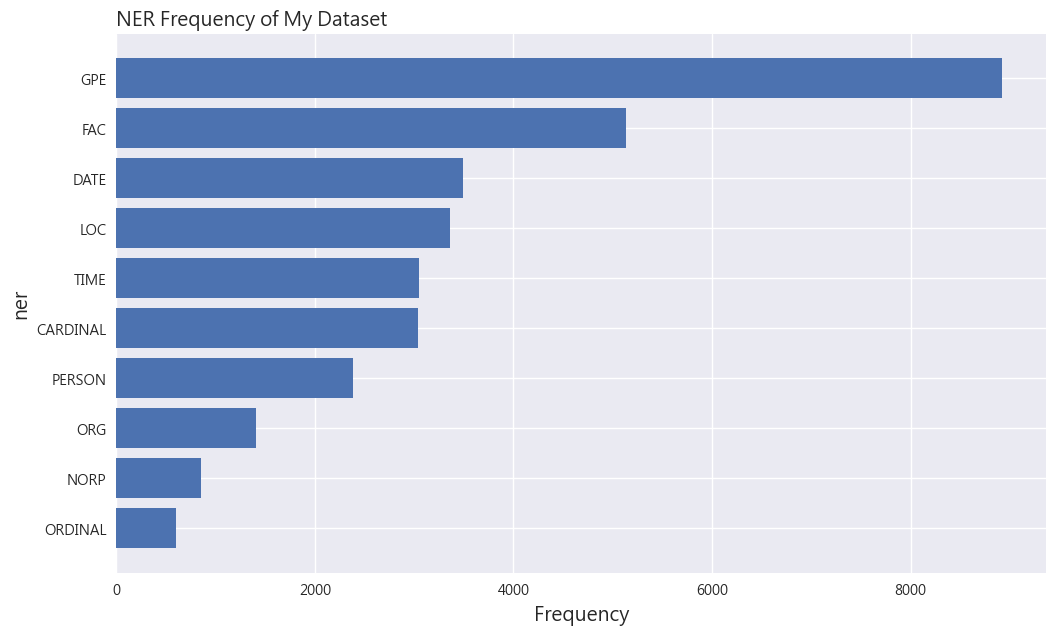

In [57]:
ner = ner_count['ner']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(ner, count)
ax.invert_yaxis()
ax.set_title('NER Frequency of My Dataset',loc ='left', size = 14)
ax.set_ylabel('ner', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

由上圖可知，最多詞彙屬於GPE(行政區)

### 設定字體

In [432]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
matplotlib.matplotlib_fname()

'c:\\Users\\win90\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

### 進一步分析 GPE、FAC、ORG

### 涉及到的行政區(GPE)

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\1387207980.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


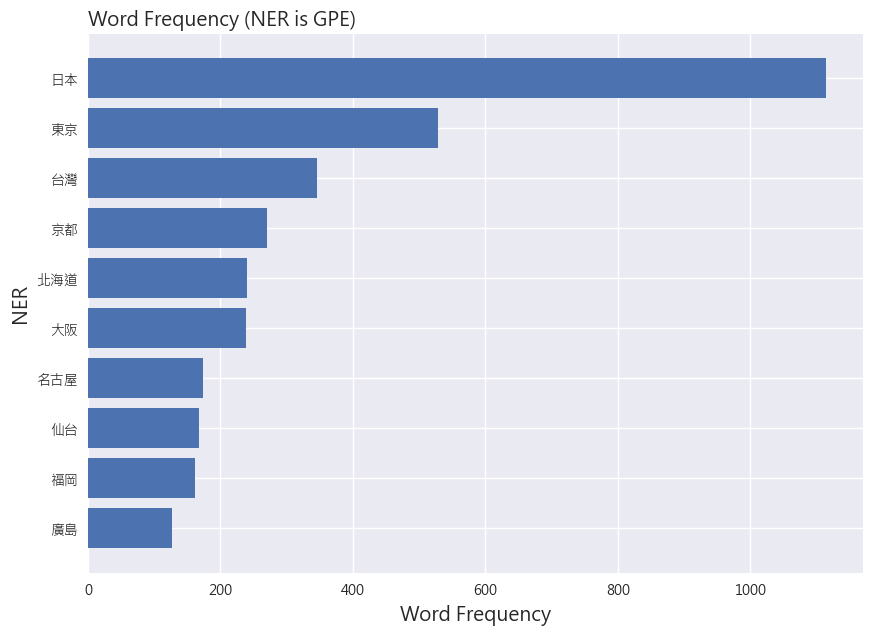

In [433]:

# 篩選ner為GPE的資料
l_noun = ["GPE"]
GPE = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = GPE.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# # 設定中文字形
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is GPE)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

由於資料集為日本旅遊文章，因此除了台灣以外都是日本的行政區。

### 涉及到的設施(FAC)

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\4179573848.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


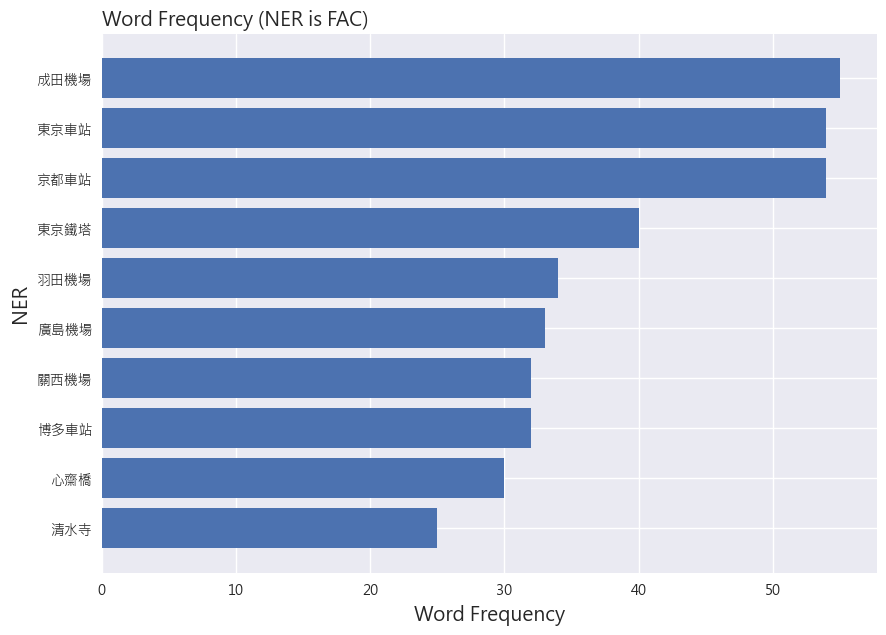

In [434]:
# 篩選ner為FAC的資料
l_noun = ["FAC"]
FAC = entity_table[entity_table.ner.isin(l_noun)]

# # 計算每個名詞提到的次數，選出前10個
ner_count = FAC.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(10).reset_index()
ner_count

# 設定中文字形
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is FAC)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

出現設施前幾名大多是交通設施，可以反映出旅遊時對於交通設施便利的重視。

此外也有出現東京鐵塔、心齋橋、清水寺等旅遊景點，這些可能是台灣遊客關注的景點。

### 涉及到的組織(ORG)

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\3428859794.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


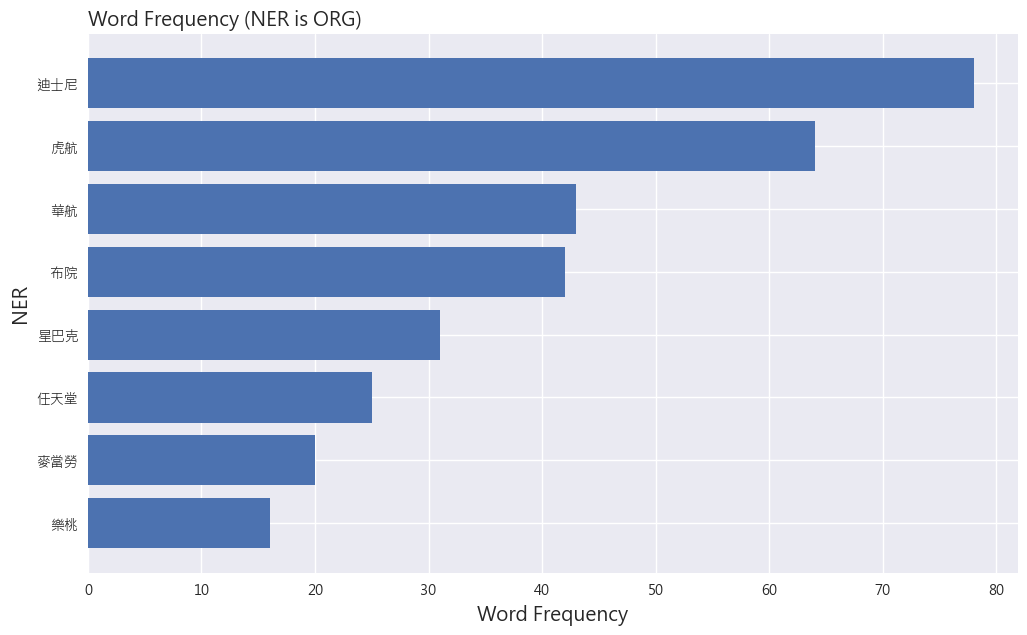

In [435]:
# 篩選ner為LOC的資料
l_noun = ["ORG"]
ORG = entity_table[entity_table.ner.isin(l_noun)]

# 計算每個名詞提到的次數，選出前8個
ner_count = ORG.groupby('word')['word'].agg(['count'])
ner_count = ner_count.sort_values(['count'],ascending=False)['count'].nlargest(8).reset_index()

# 設定中文字形
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = ner_count['word']
count = ner_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is ORG)',loc ='left', size = 14)
ax.set_ylabel('NER', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

可以看到在多數的日本旅遊文章之中，「迪士尼」是多數文章會介紹到的一環，反映出讀者對於迪士尼的關注。

### 下面找出「迪士尼」相關文章，與後續情緒分析一起做探索

In [436]:
keyword_list = ['迪士尼']
shu_selected = df[df['artContent'].str.contains('|'.join(keyword_list),regex=True)]
print(f"{' '.join(keyword_list)}：{shu_selected.shape[0]}篇相關貼文")
shu_selected.head(3)

迪士尼：39篇相關貼文


system_id                                             artUrl  \
13         14  https://www.ptt.cc/bbs/Japan_Travel/M.16497248...   
35         36  https://www.ptt.cc/bbs/Japan_Travel/M.16641251...   
61         62  https://www.ptt.cc/bbs/Japan_Travel/M.16664443...   

                  artTitle              artDate  artPoster   artCatagory  \
13  Fw:[心得]日本東京灣希爾頓飯店住宿含早餐  2022-04-12 08:53:26  faigo3ppp  Japan_Travel   
35       [分享]自製的日本東京旅遊手冊分享  2022-09-26 00:58:43    Yeanfan  Japan_Travel   
61    [徵人][旅伴]11/20～26東京京都  2022-10-22 21:12:32      louio  Japan_Travel   

                                           artContent  \
13  作者: faigo3ppp (Dr. Lai) 看板: Hotel\n標題: [心得] 日本...   
35  前言\n好懷念搭飛機出國旅遊的日子\n目前為止出國次數：10次\n日本5次，新加坡2次，韓國...   
61  徵人類別: 幾天旅伴+全程6晚上室友\n\n希望7～8年級女生為主\n\n有日本自助旅行經驗...   

                                           artComment            e_ip  \
13  [{"cmtStatus": "→", "cmtPoster": "Rissu", "cmt...  111.248.166.49   
35  [{"cmtStatus": "推", "cmtPoster": "roger61212",...    42.79.189.32   
61  [{"cmtStatus": "推", "cmtPoster": "starfishfish...    36.230.9.115   

           insertedDate dataSource  
13  2022-04-13 01:50:18        ptt  
35  2022-09-26 01:44:45        ptt  
61  2022-10-23 01:42:05        ptt

### 3.3 探索分析 - POS

#### POS 種類分析
查看辨識出哪幾種POS<br>
名詞對應: https://ckip.iis.sinica.edu.tw/service/corenlp/ （左上角的標記列表）

In [437]:
pos_table['pos'].unique()

array(['Nd', 'VH', 'VC', 'Na', 'P', 'Nes', 'Nf', 'Nc', 'Ng', 'D',
       'COMMACATEGORY', 'Cbb', 'VE', 'VJ', 'V_2', 'VD', 'VF', 'VA', 'FW',
       'SHI', 'Neu', 'Nh', 'VG', 'DE', 'Ncd', 'Dfa', 'Nb', 'VK', 'Nep',
       'I', 'Cba', 'VB', 'T', 'VCL', 'Di', 'Neqa', 'A', 'Cab', 'VL',
       'Caa', 'VI', 'VHC', 'Da', 'PARENTHESISCATEGORY', 'Neqb', 'Nv',
       'Dk', 'VAC', 'DM', 'Dfb', 'PERIODCATEGORY', 'COLONCATEGORY',
       'DASHCATEGORY', 'ETCCATEGORY'], dtype=object)

看看除了標點符號，大部分的POS都是哪一類

In [438]:
pos_filter = pos_table[~pos_table.pos.isin(['COMMACATEGORY', 'PARENTHESISCATEGORY', 'PERIODCATEGORY', 'COLONCATEGORY'])]

pos_count = pos_filter.groupby(['pos'])['pos'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(12)
pos_count

pos   count
17   Na  105615
5     D   59991
19   Nc   48836
37   VC   39838
43   VH   34574
7    DE   28626
15   FW   20159
34   VA   18350
31    P   17339
27   Nf   15524
10  Dfa   12020
38  VCL   11586

#### POS 常見詞性列表
+ Na: 普通名詞
+ D: 副詞
+ VC: 動作及物動詞
+ Nb: 專有名詞
+ FW: 外文
+ VH: 狀態不及物動詞
+ Nh: 代名詞
+ DE: 的之得地
+ P: 介詞
+ VA: 動作不及物動詞
+ T: 語助詞
+ SHI: 是

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\2464247814.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


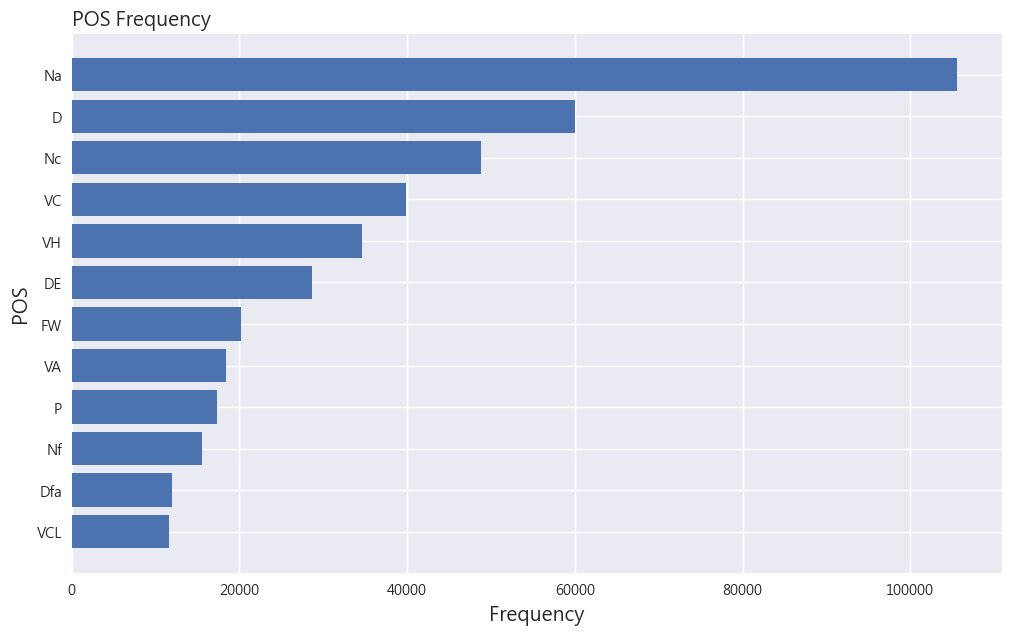

In [439]:
pos = pos_count['pos']
count = pos_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(pos, count)
ax.invert_yaxis()
ax.set_title('POS Frequency',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Frequency', size = 14)
fig.show()

可以看見，最多的是 Na: 普通名詞

### 涉及到的名詞(Noun)
+ 我們可以找出談論日本旅遊時大部分討論到的名詞，探索大家的關注焦點。
+ 名詞可以分為「Na: 普通名詞」、「Nb: 專有名詞」等

In [440]:
# 篩選pos為專有名詞的資料
l_noun = ["Nb"] #,"Na"
noun = pos_table[pos_table.pos.isin(l_noun)]

# 計算每個名詞提到的次數，選出前15個
noun_count = noun[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
noun_count.head(10)

word  count
2288  迪士尼    216
798    富士    137
2147   虎航     80
1982   羽田     80
291     円     65
1233   星宇     55
50     三井     53
175   任天堂     48
1479   武雄     47
2125   藏王     44

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\553422106.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


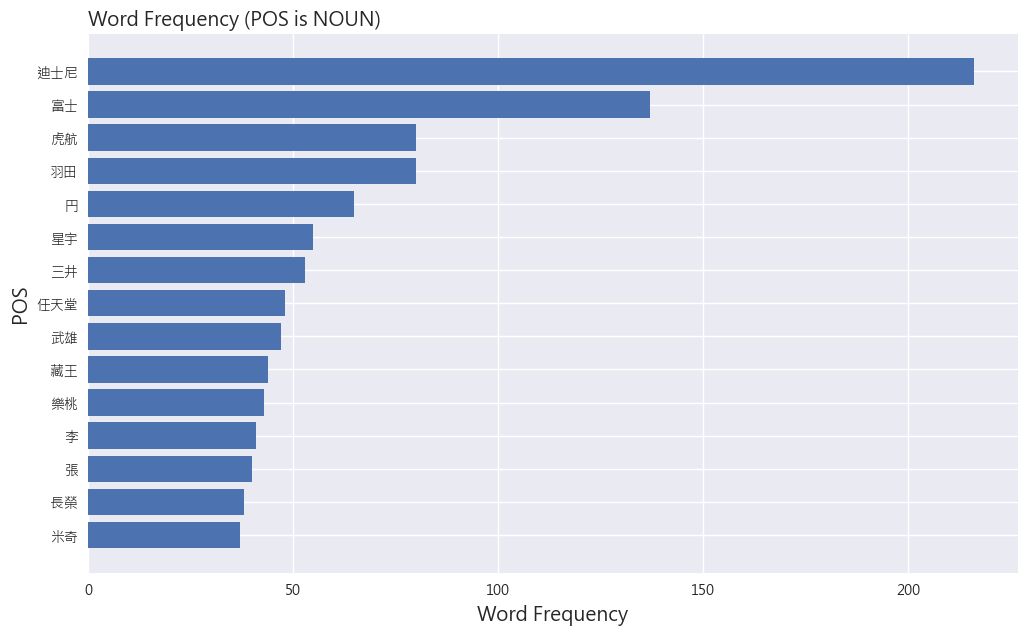

In [441]:
# 設定中文字形
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = noun_count['word']
count = noun_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is NOUN)',loc ='left', size = 14)
ax.set_ylabel('POS', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

「迪士尼」依舊為出現次數最多的專有名詞，

### 涉及到的動詞(VERB)
+ 我們可以找出談論吃到飽時大部分討論到的動詞，探索相關行為。
+ VC: 動作及物動詞、VH: 狀態不及物動詞、VA: 動作不及物動詞

In [442]:
l_verb = ["VC"] # ,"VH","VA"
verb = pos_table[pos_table.pos.isin(l_verb)] # 選取特定詞性
verb = verb[verb['word'].map(len) > 1] # 把長度為1的字去除掉

verb_count = verb[['word']].groupby(['word'])['word'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(15)
verb_count

word  count
108    使用    658
3042   選擇    547
2970   造訪    525
1363   推薦    450
1445   搭乘    376
3312   體驗    325
1753   服務    308
3226   離開    287
3252   預約    258
2995   遇到    238
1474   搭配    232
487    吃完    225
482    吃到    201
441    參考    201
2216   看看    184

C:\Users\win90\AppData\Local\Temp\ipykernel_17116\2721100757.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


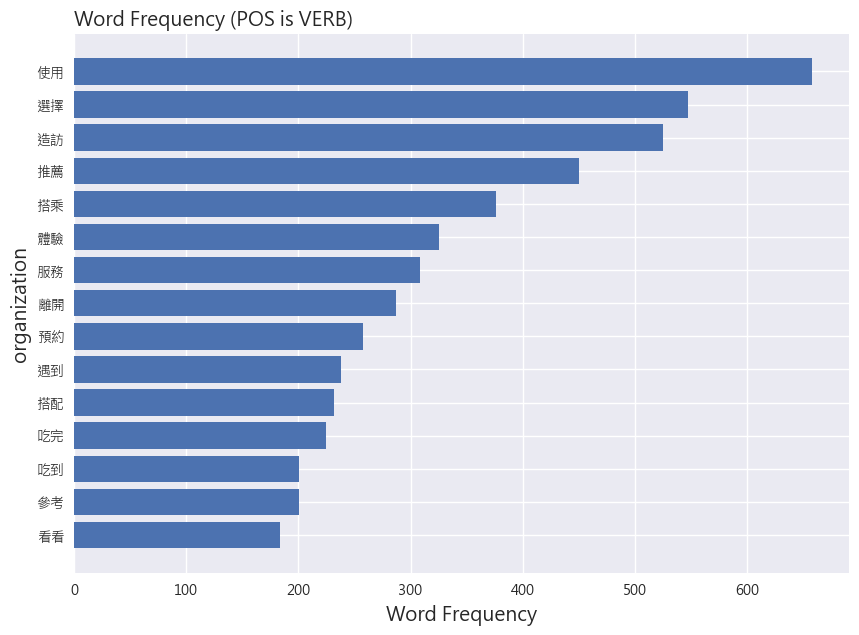

In [443]:
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
word = verb_count['word']
count = verb_count['count']

fig, ax = plt.subplots(figsize =(10, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (POS is VERB)', loc ='left', size = 14)
ax.set_ylabel('organization', size = 14)
ax.set_xlabel('Word Frequency', size = 14)
fig.show()

發現在貼文中的動詞，「使用」佔了相當高的頻率，其他還有出現「選擇」、「造訪」等詞彙，綜觀前14常用動詞，可推測民眾對於遊玩體驗選擇有較高的重視程度。

## 4. 利用SnowNLP進行情緒分析

+ SnowNLP 針對中文設計，可以提取句子的情緒分類
+ 使用文件分類法，套件已預先用文集訓練模型以判斷情緒
+ 情緒值在 0~1之間，代表負面到正面
+ 官方github: https://github.com/isnowfy/snownlp

In [444]:
from snownlp import SnowNLP
s = SnowNLP('這部電影很讚')
s.sentiments # 範圍在 0~ 1之間 (負面~正面)

0.786074481210413

使用先前NER得到的「迪士尼」相關文章，看看迪士尼相關文章的情緒表現。<br>
首先將句子和日期合併，方便之後做分析

In [445]:
sentence_table = pd.read_csv("raw_data/zh/sentence_table_MyDataset.csv") #匯資料

sentiment_date = pd.merge(sentence_table,shu_selected[['system_id','artDate','dataSource']],on='system_id',how='left').dropna()
sentiment_date.head(3)

system_id             sentence              artDate dataSource
981         14                 作者看板  2022-04-12 08:53:26        ptt
982         14  標題心得日本東京灣希爾頓飯店住宿含早餐  2022-04-12 08:53:26        ptt
983         14                   時間  2022-04-12 08:53:26        ptt

In [446]:
def get_sentiment(sent):
    s = SnowNLP(sent)
    return s.sentiments

# 幫每句話加上情緒分數
sentiment_date['sentimentValue'] = sentiment_date.apply(lambda row : get_sentiment(row['sentence'],), axis = 1)
sentiment_date.head(10)

system_id             sentence              artDate dataSource  \
981         14                 作者看板  2022-04-12 08:53:26        ptt   
982         14  標題心得日本東京灣希爾頓飯店住宿含早餐  2022-04-12 08:53:26        ptt   
983         14                   時間  2022-04-12 08:53:26        ptt   
984         14       住宿名稱日本東京灣希爾頓飯店  2022-04-12 08:53:26        ptt   
985         14               入住時間//  2022-04-12 08:53:26        ptt   
986         14             住宿地址,,日本  2022-04-12 08:53:26        ptt   
987         14                 住宿電話  2022-04-12 08:53:26        ptt   
988         14            住宿房型海陽三人房  2022-04-12 08:53:26        ptt   
989         14            公共設施泳池健身房  2022-04-12 08:53:26        ptt   
990         14                 心得介紹  2022-04-12 08:53:26        ptt   

     sentimentValue  
981        0.644578  
982        0.002454  
983        0.088549  
984        0.033768  
985        0.009076  
986        0.190814  
987        0.030922  
988        0.107534  
989        0.634343  
990        0.944869

In [447]:
# 看一下情緒的分布
sentiment_date['sentimentValue'].describe()

count    3197.000000
mean        0.395370
std         0.320524
min         0.000004
25%         0.109438
50%         0.287317
75%         0.652972
max         0.999997
Name: sentimentValue, dtype: float64

<AxesSubplot:>

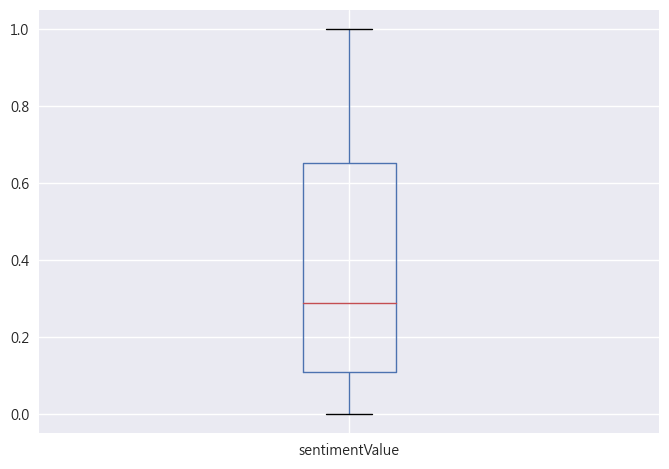

In [448]:
# 情緒分布的盒狀圖
boxplot = sentiment_date.boxplot(column=['sentimentValue'], showfliers=False)
boxplot

將每個月的情緒分數取平均，並轉換時間格式為年月

In [449]:
sent_date = sentiment_date.copy()
sent_date['artDate'] =  pd.to_datetime(sentiment_date['artDate']).dt.to_period('M')

sentiment_count = sent_date.groupby(['artDate'])['sentimentValue'].mean().reset_index()
sentiment_count

artDate  sentimentValue
0   2022-04        0.355413
1   2022-09        0.465318
2   2022-10        0.320625
3   2022-12        0.351631
4   2023-01        0.456506
5   2023-02        0.368054
6   2023-03        0.375664
7   2023-04        0.347953
8   2023-06        0.431720
9   2023-07        0.407960
10  2023-08        0.445130
11  2023-09        0.480728
12  2023-10        0.388511
13  2023-11        0.497712
14  2023-12        0.261400
15  2024-01        0.423273
16  2024-02        0.243586

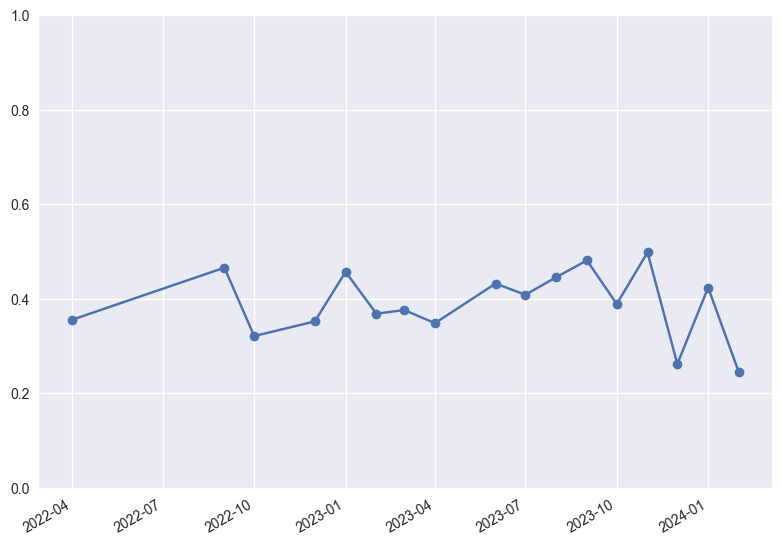

In [450]:
# 平均情緒分數時間趨勢
months = [period.to_timestamp() for period in sentiment_count['artDate']]   # 將 PeriodIndex 中的每個 Period 物件轉換為對應的 datetime 物件
y = sentiment_count['sentimentValue']

plt.style.use('seaborn')

plt.plot_date(months, y, linestyle='solid')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 1)

plt.show()

從上圖中發現大部分天數的情緒值都在0.3~0.5之間，情緒值介於中間偏低。

### 詞彙探索
從上圖中可以發現 **2023年10月** 的情緒分數相對高，我們把這個月的正面句子挑出來看看他們都用甚麼詞。

In [451]:
# 篩時間
filter_sentiment = sent_date[sent_date['artDate']=='2023-10']
filter_sentiment = filter_sentiment.loc[filter_sentiment['sentimentValue'] > 0.7]

filter_sentiment.head(2000)

system_id                            sentence  artDate dataSource  \
41972        567                            河口湖兩床塌塌米  2023-10        ptt   
41976        567           成田機場成田租車好市多幕張倉庫店海老名休息站御殿場  2023-10        ptt   
41983        567           御殿場號店花之都公園忍野八海不動餺飥富士急樂園河口  2023-10        ptt   
41984        567                    湖自然生活館和牛焼肉よりとも住宿  2023-10        ptt   
41987        567                  忍野八海很有味道逛起來舒服，建議必來  2023-10        ptt   
41994        567                  住宿河口湖纜車上野還車上野東金屋放行  2023-10        ptt   
42000        567                         真的很驚艷，很適合拍照  2023-10        ptt   
42003        567                              ~移動到舞濱  2023-10        ptt   
42007        567                       大推秋葉原裡面的牛奶專賣店  2023-10        ptt   
42009        567  上野的鰻魚飯專賣店，如果是外帶可以不用排隊，最後是帶去附近公園坐著吃  2023-10        ptt   
42011        567                             舞濱迪士尼舞濱  2023-10        ptt   
42012        567                     早上八點搭機場接駁巴士去迪士尼  2023-10        ptt   
42014        567                             美女與野獸課金  2023-10        ptt   
42015        567                            幽靈公館小熊維尼  2023-10        ptt   
42018        567    建議週二~週四來玩，週人還是超多，但碰到成人也能角色扮演的萬聖節  2023-10        ptt   
42019        567                      女兒看到超級多各種公主超滿足  2023-10        ptt   
42023        567           中午的飛機，早走路分鐘到迪士尼海洋飯店搭利木津巴士  2023-10        ptt   
43245        585                            電子憑證二張合售  2023-10        ptt   
43248        585                     關西周遊卡三日電子憑證二張合售  2023-10        ptt   
43259        585                          關西周遊卡三日元/張  2023-10        ptt   
43263        585                         關西周遊卡三日元/二張  2023-10        ptt   
43276        585                      迪士尼與環球樂園票券及衍生物  2023-10        ptt   
43282        585                      讓售單品項數量不可以超過四張  2023-10        ptt   
43296        585          機票包含購買機票用之代金券/里程/自由行/卡/房間/  2023-10        ptt   
43298        585                    環球影城/迪士尼門票以及衍生商品  2023-10        ptt   
43306        585     若是以日幣或其他外幣購入而欲以新台幣售出，請依以下格式計算金額  2023-10        ptt   
43317        586                         到日本旅行很多人都喜歡  2023-10        ptt   
43321        586              玩好迪士尼週年生次，更別說新開美女與野獸園區  2023-10        ptt   
43335        586           東京車站出發搭乘不轉車到達舞濱站東京迪士尼樂園週年  2023-10        ptt   
43336        586            出發前往東京車站鋼鐵大樓搭乘高速巴士抵達河口湖站  2023-10        ptt   
43337        586             入住河口湖第排湖山亭產屋盡情享受館內設施及晚餐  2023-10        ptt   
43338        586                 搭乘高速巴士到新宿站入住東橫新宿歌舞町  2023-10        ptt   

       sentimentValue  
41972        0.942204  
41976        0.848864  
41983        0.969407  
41984        0.903782  
41987        0.995235  
41994        0.956995  
42000        0.781513  
42003        0.836283  
42007        0.997611  
42009        0.995369  
42011        0.763382  
42012        0.744563  
42014        0.966261  
42015        0.968491  
42018        0.983752  
42019        0.726046  
42023        0.944911  
43245        0.759563  
43248        0.775569  
43259        0.919948  
43263        0.907773  
43276        0.785936  
43282        0.965370  
43296        0.865057  
43298        0.928360  
43306        0.767068  
43317        0.949911  
43321        0.985907  
43335        0.993403  
43336        0.999666  
43337        0.904131  
43338        0.970833

In [452]:
# 把時間分數和之前斷詞的 token table 做 join
pos_words = pd.merge(filter_sentiment,pos_table,on='system_id',how='left')
pos_words = pos_words[['system_id','sentimentValue','word']]
pos_words.head()

system_id  sentimentValue word
0        567        0.942204   距離
1        567        0.942204    上
2        567        0.942204    次
3        567        0.942204    去
4        567        0.942204   東京

In [453]:
# 篩選掉只有單個字元的結果
pos_words = pos_words[pos_words.apply(lambda x: len(x['word'])>1, axis=1)]

### 正面詞彙文字雲

In [454]:
# 自定停用字
with open('dict/stop_words.txt', encoding='utf-8') as f:
    stop_words = f.read().splitlines()

print(stop_words)

[',', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '可否', '有無', '再', '本來', '是不是', '一個', '這種', '人民', '末##末', '啊', '阿', '哎', '哎呀', '哎喲', '唉', '我', '我們', '按', '按照', '依照', '吧', '吧噠', '把', '罷了', '被', '本', '本著', '比', '比方', '比如', '鄙人', '彼', '彼此', '邊', '別', '別的', '別說', '並', '並且', '不比', '不成', '不單', '不但', '不獨', '不管', '不光', '不過', '不僅', '不拘', '不論', '不怕', '不然', '不如', '不特', '不惟', '不問', '不只', '朝', '朝著', '趁', '趁著', '乘', '沖', '除', '除此之外', '除非', '除了', '此', '此間', '此外', '從', '從而', '打', '待', '但', '但是', '當', '當著', '到', '得', '的', '的話', '等', '等等', '地', '第', '叮咚', '對', '對於', '多', '多少', '而', '而況', '而且', '而是', '而外', '而言', '而已', '爾後', '反過來', '反過來說', '反之', '非但', '非徒', '否則', '嘎', '嘎登', '該', '趕', '個', '各', '各個', '各位', '各種', '各自', '給', '根據', '跟', '故', '故此', '固然', '關於', '管', '歸', '果然', '果真', '過', '哈', '哈哈', '呵', '和', '何', '何處', '何況', '何時', '嘿', '哼', '哼唷', '呼哧', '乎', '嘩', '還是', '還有', '換句話說', '換言之', '或', '或是', '或者', '極了', '及', '及其', '及至', '即', '即便', '即或', '即令', '即若', '即使', '幾', '幾時', '己', '既', '既然', '既是', 

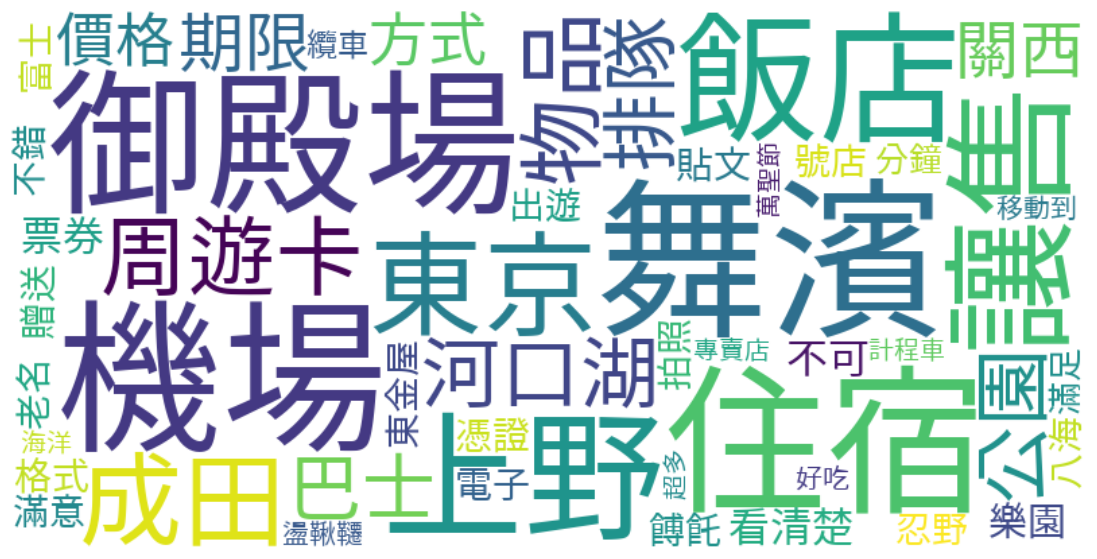

In [455]:
# 匯入自訂的 stop words (預設只有英文的)
stop_words_pos = stop_words
stop_words_pos.extend(("in", "一下", "一位", "一個", "一直", "一點", "下午", "不用", "主要", "之後", "今天", "今年", "今日", "他們", "以下", "以後", 
                        "使用", "來到", "入住", "內容", "出發", "分享", "前往", "包含", "包括", "可能", "吃到", "各位", "名稱", "回到", "因一", "因上",
                        "地方", "好像", "完整", "就是", "層面", "左右", "年前", "年增", "建議", "感覺", "成為", "我們", "打打", "抵達", "持續", "指出",
                        "提供", "搭配", "整個", "方面", "旁邊", "日期", "早上", "明天", "明年", "明日", "昨日", "是否", "晚上", "最後", "月底", "有",
                        "有沒有", "有無", "東西", "決定", "沒", "沒有", "準備", "然後", "特別", "現在", "發現", "發生", "目前", "直接", "相關", "看到",
                        "看看", "知道", "碰到", "維持", "聞到", "聽到", "表示", "裡面", "認為", "謝謝", "這", "這裡", "這間", "造成", "造訪", "進行", 
                        "過去", "那裡", "附近", "隔天", "離開", "需要", "顯示", "以上", "真的", "迪士尼", "務必", "確認", "日幣"))

stop_words_pos = set(stop_words_pos)

# 設定中文字形
font_path = 'TaipeiSansTCBeta-Regular.ttf'

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words_pos,
                collocations=False,
                font_path=font_path,
                width=800, 
                height = 400, 
                max_words=50, 
                background_color="white")

wordcloud.generate(' '.join(pos_words['word']))
# Display the generated image:
plt.figure(figsize = (14,7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

藉由各式設施以及「御殿場」、「舞濱」、「上野」等詞彙出現在正向文章中，可以知道多數文章對迪士尼及富士山的周邊設施及地點有正面的評價，另外，「周遊卡」、「票券」、「排隊」等也是多數文章會提及的遊玩相關詞彙。